<a href="https://colab.research.google.com/github/Bjoyita/ImageSimulation/blob/main/Microstructure_generation_web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from skimage import io, color
#from skimage.filters import difference_of_gaussians, window
from scipy.fft import fftn, fftshift
#from skimage.segmentation import clear_border

**Simulated image 1**

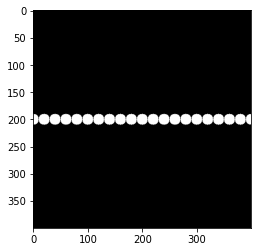

In [ ]:
Micro1 = np.zeros((400,400), np.uint8) # mask should have the same dimension as that of the image
center_x = 400/2
center_y = 400/2

# OPEN GRID
x, y = np.ogrid[:400, :400]
for j in range(0, 401, 20):
  circles_w = (x-center_x)**2 + (y-j)**2 <= 10**2
  Micro1[circles_w]=1
  plt.imshow(Micro1, cmap ='gray')


**Fourier Transform**

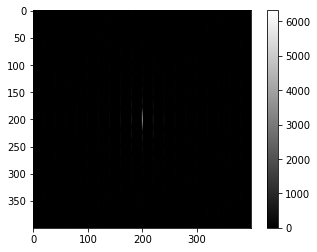

In [ ]:
Micro1_f = np.fft.fft2(Micro1)
Micro1_f_shift = np.fft.fftshift(Micro1_f)
Micro1_shift=plt.imshow((abs(Micro1_f_shift)), cmap ='gray')
plt.colorbar(Micro1_shift)
plt.show()


**Simulated image 2**

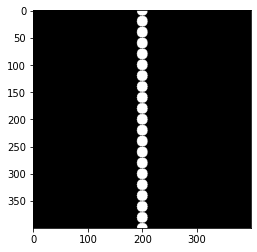

In [ ]:
Micro2 = np.zeros((400,400)) # mask should have the same dimension as that of the image
center_x = 400/2
center_y = 400/2

# OPEN GRID
x, y = np.ogrid[:400, :400]
for j in range(0, 401, 20):
  circles_h = (x-j)**2 + (y-center_y)**2 <= 10**2
  Micro2[circles_h]=1
  plt.imshow(Micro2, cmap ='gray')

**Fourier transform**

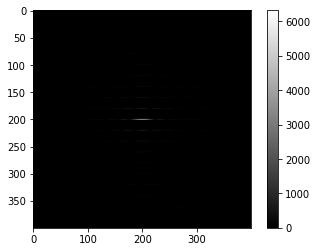

In [ ]:
Micro2_f = np.fft.fft2(Micro2)
Micro2_f_shift = np.fft.fftshift(Micro2_f)
Micro2_shift=plt.imshow((abs(Micro2_f_shift)), cmap ='gray')
plt.colorbar(Micro2_shift)
plt.show()

**Simulated Image 3** 

In [ ]:
Box = np.zeros((400,400)) 

# OPEN GRID
x, y = np.ogrid[:400, :400]

for i in range(0,420,20):
    for j in range(0,420,20):
        circles = (x-i)**2 + (y-j)**2 <= 5**2
        Box[circles] = 1.0


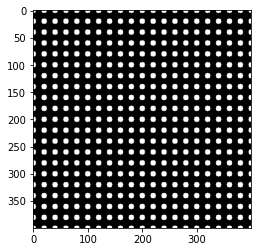

In [ ]:
plt.imshow(Box, cmap ='gray')

**Reciprocal space: Fourier Transform**

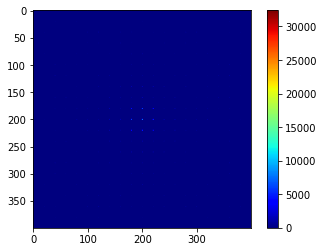

In [ ]:
Box_f = np.fft.fft2(Box)
Box_f_shift = np.fft.fftshift(Box_f)
Box_shift=plt.imshow(abs(Box_f_shift), cmap ='jet')
plt.colorbar(Box_shift)
plt.show()

**Simulated Image 4**

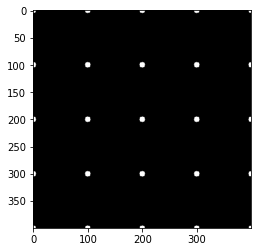

In [ ]:
Box1 = np.zeros((400,400)) 

# OPEN GRID
x, y = np.ogrid[:400, :400]

for i in range(0,420,100):
    for j in range(0,420,100):
        circles = (x-i)**2 + (y-j)**2 <= 5**2
        Box1[circles] = 1.0
plt.imshow(Box1, cmap ='gray')

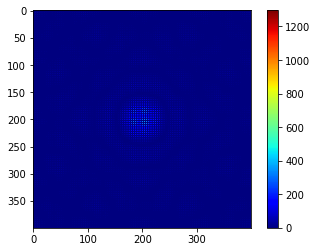

In [ ]:
Box1_f = np.fft.fft2(Box1)
Box1_f_shift = np.fft.fftshift(Box1_f)
Box1_shift=plt.imshow(abs(Box1_f_shift), cmap ='jet')
plt.colorbar(Box1_shift)
plt.show()

**Function and Image generation**

In [ ]:
x= np.linspace(0, 6*np.pi, 50)
y= np.linspace(0, 6*np.pi, 50)

In [ ]:
X,Y = np.meshgrid(x,y)
f = np.ones([50, 50])
f = np.sin(4*np.pi*X) + np.cos(6*np.pi*Y)

In [ ]:
f.shape

(50, 50)

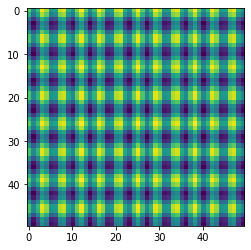

In [ ]:
plt.imshow(f)

**Fourier transform**

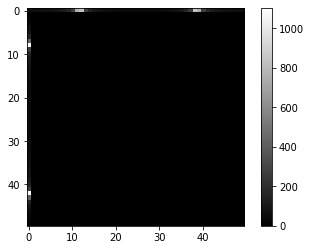

In [ ]:
f_f = np.fft.fft2(f)
f_f001=plt.imshow(abs(f_f), cmap ='gray')
plt.colorbar(f_f001)
plt.show()

**Origin centering**

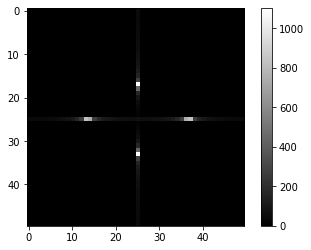

In [ ]:
f_f_shift = np.fft.fftshift(f_f)
f_shift=plt.imshow(abs(f_f_shift), cmap ='gray')
plt.colorbar()
plt.show()

**Inverse Fourier Transform**

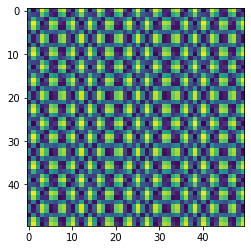

In [ ]:
originalImage = np.fft.ifft2(f_f_shift)
plt.imshow(abs(originalImage))

**3D projection showing sinusoidal characteristics**

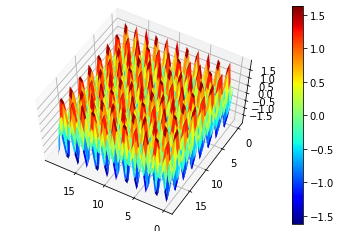

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
f_surf = ax.plot_surface(X, Y, f, cmap='jet')
                       
ax.view_init(60,120)
fig.colorbar(f_surf)

plt.show()

---------------------------------------------------------------------

In [ ]:
x= np.linspace(-2, 2, 128)
y= np.linspace(-2, 2,128)

X,Y = np.meshgrid(x,y,indexing='xy')
f1 = np.ones([128, 128])
f1 = np.sin(2*np.pi*X + 3*np.pi*Y)

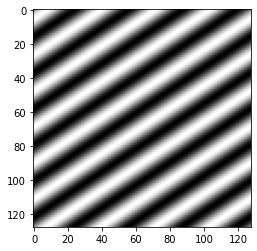

In [ ]:
plt.imshow(f1, cmap='gray')

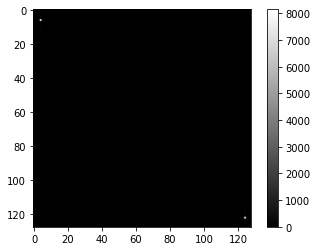

In [ ]:
f1_f = np.fft.fft2(f1)
f1_f001=plt.imshow(abs(f1_f), cmap ='gray')
plt.colorbar(f1_f001)
plt.show()

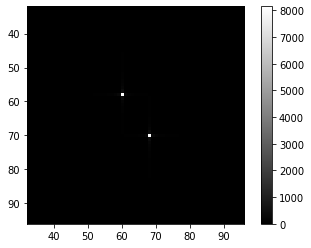

In [ ]:
f1_f_shift = np.fft.fftshift(f1_f)
f1_shift=plt.imshow(abs(f1_f_shift), cmap ='gray')
plt.xlim((32,96))
plt.ylim((96,32))
plt.colorbar()
plt.show()

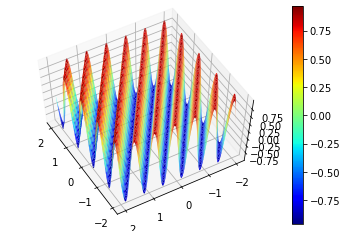

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
f1_surf = ax.plot_surface(X, Y, f1, cmap='jet')
                       
ax.view_init(60,150)
fig.colorbar(f1_surf)

plt.show()